#### Author: Michael Polinsky

# Project 2: Epicurious Recipe Data, PCA, and Logistic Regression

#### Imports

In [926]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sbn
import scipy as sp
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.decomposition import PCA
from sklearn.metrics import matthews_corrcoef as matts_c
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score

## Load Data

In [927]:
all_data = pd.read_csv('epi_r.csv')

## Describe data

In [928]:
all_data.describe()

,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
count,20052.000000,1.593500e+04,15890.000000,1.586900e+04,1.593300e+04,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,...,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000
mean,3.714467,6.322958e+03,100.160793,3.468775e+02,6.225975e+03,0.000299,0.000050,0.000848,0.001346,0.000349,...,0.001247,0.026332,0.000050,0.000299,0.014861,0.000150,0.000349,0.001396,0.000948,0.022741
std,1.340829,3.590460e+05,3840.318527,2.045611e+04,3.333182e+05,0.017296,0.007062,0.029105,0.036671,0.018681,...,0.035288,0.160123,0.007062,0.017296,0.121001,0.012231,0.018681,0.037343,0.030768,0.149080
min,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.750000,1.980000e+02,3.000000,7.000000e+00,8.000000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.375000,3.310000e+02,8.000000,1.700000e+01,2.940000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.375000,5.860000e+02,27.000000,3.300000e+01,7.110000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,3.011122e+07,236489.000000,1.722763e+06,2.767511e+07,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Look at rating

<AxesSubplot:>

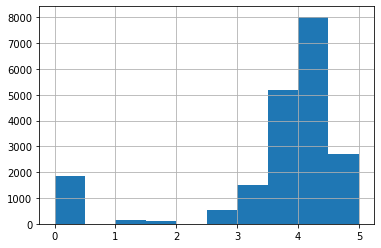

In [929]:
all_data['rating'].hist()

### There are far more scores at the top of the range than the bottom.

##  Plot 22-minute meals and #cakeweek

<AxesSubplot:>

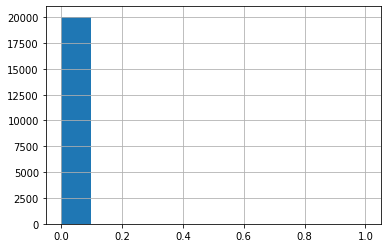

In [930]:
all_data['#cakeweek'].hist()

### These appear not to have any 1 values.

<AxesSubplot:>

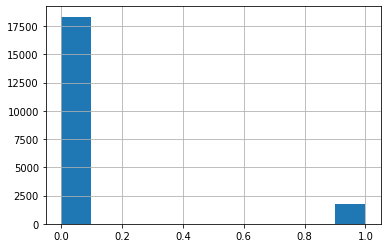

In [931]:
all_data['spring'].hist()

In [932]:
len(all_data[all_data['#cakeweek'] == 1])

6

In [933]:
len(all_data[all_data['22-minute meals'] == 1])

17

## I did more visualizations than I want to fill the notebook with here but I discovered a set of features that were not so sparse, and decided to add them.

In [934]:
len(all_data[all_data['winter'] == 1])

3099

In [935]:
len(all_data[all_data['spring'] == 1])

1715

In [936]:
len(all_data[all_data['summer'] == 1])

4151

In [937]:
len(all_data[all_data['fall'] == 1])

3015

In [938]:
len(all_data[all_data['bake'] == 1])

4413

In [939]:
len(all_data[all_data['peanut free'] == 1])

8390

## Making a smaller dataset.  Looking at histograms and a covariance matrix graph led me to try the additional categories.

In [940]:
bakers_dozen_columns = ['calories','fat','sodium','protein', 'winter', 'spring', 'summer', 'fall', 'peanut free', 'bake', '#cakeweek', '22-minute meals', 'rating'] # 13 columns

In [941]:
small_data = all_data.loc[:,bakers_dozen_columns]

# Drop duplicates and outliers from small data

In [942]:
small_data_no_dups = small_data.drop_duplicates()

In [943]:
small_data_no_dups

,calories,fat,sodium,protein,winter,spring,summer,fall,peanut free,bake,#cakeweek,22-minute meals,rating
0,426.0,7.0,559.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.500
1,403.0,23.0,1439.0,18.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.375
2,165.0,7.0,165.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.750
3,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.000
4,547.0,32.0,452.0,20.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,3.125
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20047,28.0,2.0,64.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.125
20048,671.0,28.0,583.0,22.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,4.375
20049,563.0,38.0,652.0,31.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,4.375
20050,631.0,24.0,517.0,45.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.375


# Dropping outliers 

In [944]:
drop_list = small_data_no_dups[(small_data_no_dups['fat'] > 300) | (small_data_no_dups['calories'] > 5000) | (small_data_no_dups['sodium'] > 5000) | (small_data_no_dups['protein'] > 300) ].index 

In [945]:
small_data_dropped = small_data_no_dups.drop(drop_list)

# Drop NA

In [946]:
df = small_data_dropped.dropna()

## The number of instances with 1s for '#cakeweek' and '22-minute meals' is dwindling.

In [947]:
len(df[df['#cakeweek'] == 1])

4

In [948]:
len(df[df['22-minute meals'] == 1])

15

# Train/Test Splits

In [949]:
xList = ['fat','calories','protein','sodium','bake','peanut free'] 
yList = ['rating','#cakeweek','22-minute meals', 'winter','spring','summer','fall']

In [950]:
trainX, testX, trainY, testY = train_test_split(df[xList], df[yList], train_size = 0.8, 
                                                          test_size = 0.2, 
                                                          random_state = 100)

### And now we have the following 1-0 splits in our Y sets. (I realize that in practice we never look at the test data.)

In [951]:
len(trainY[trainY['22-minute meals'] == 1])

10

In [952]:
len(trainY[trainY['22-minute meals'] == 0])

11323

In [953]:
len(testY[testY['22-minute meals'] == 1])

5

### This means #cakeweek will have all 0s in the test data, and the regressor will only see 4 1s vs 11,329 0s.
### The same numbers for '22-minute meals' are 10 1s vs 11323 0s  in the training set and only 5 1s in the test.

# Scale the data

### I'm using a MaxAbsScaler because I read that it maintains sparseness in data.  I wondered if that would be a good thing or not, so I tried using StandardScaler instead and found that the classification was worse, and the PCA required twice as many components to account for 95% of the variance compared to MaxAbsScaler.  

#### Scale training X

In [954]:
# also try MinMaxScaler
scaler = MaxAbsScaler().fit(trainX)
scaled_data = scaler.transform(trainX)
sdf1 = pd.DataFrame(scaled_data)
sdf1

,0,1,2,3,4,5
0,0.108108,0.072059,0.049822,0.158358,0.0,0.0
1,0.027027,0.023685,0.035587,0.088889,0.0,1.0
2,0.003378,0.039141,0.007117,0.000400,0.0,1.0
3,0.118243,0.115817,0.010676,0.002803,0.0,1.0
4,0.324324,0.282015,0.060498,0.119520,0.0,0.0
...,...,...,...,...,...,...
11328,0.060811,0.102770,0.032028,0.128128,0.0,1.0
11329,0.006757,0.060618,0.195730,0.320320,0.0,1.0
11330,0.084459,0.120434,0.195730,0.264064,0.0,0.0
11331,0.040541,0.043557,0.010676,0.033233,0.0,0.0


#### Scale test X

In [955]:
scaler_test = MaxAbsScaler().fit(testX)
scaled_data_test = scaler_test.transform(testX)
sdf2 = pd.DataFrame(scaled_data_test)

## show distributions before and after scaling

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>],
       [<AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>],
       [<AxesSubplot:title={'center':'4'}>,
        <AxesSubplot:title={'center':'5'}>]], dtype=object)

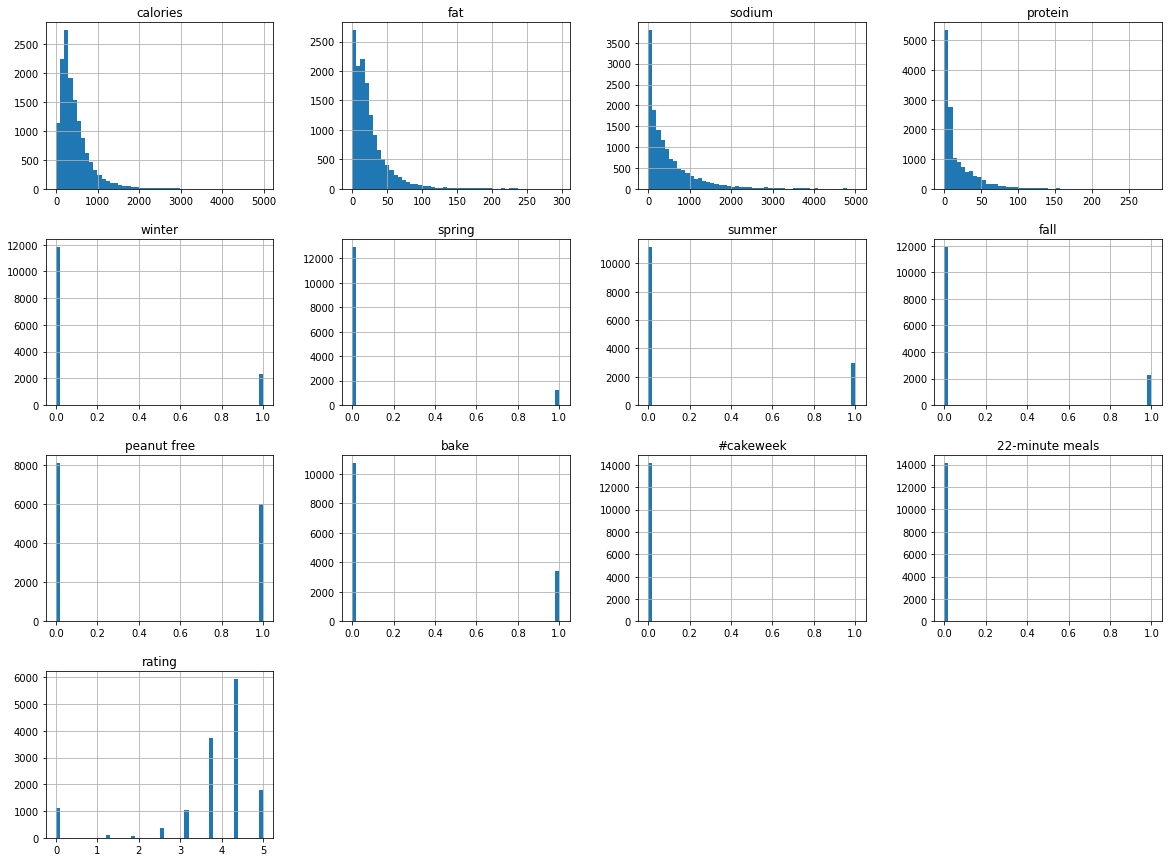

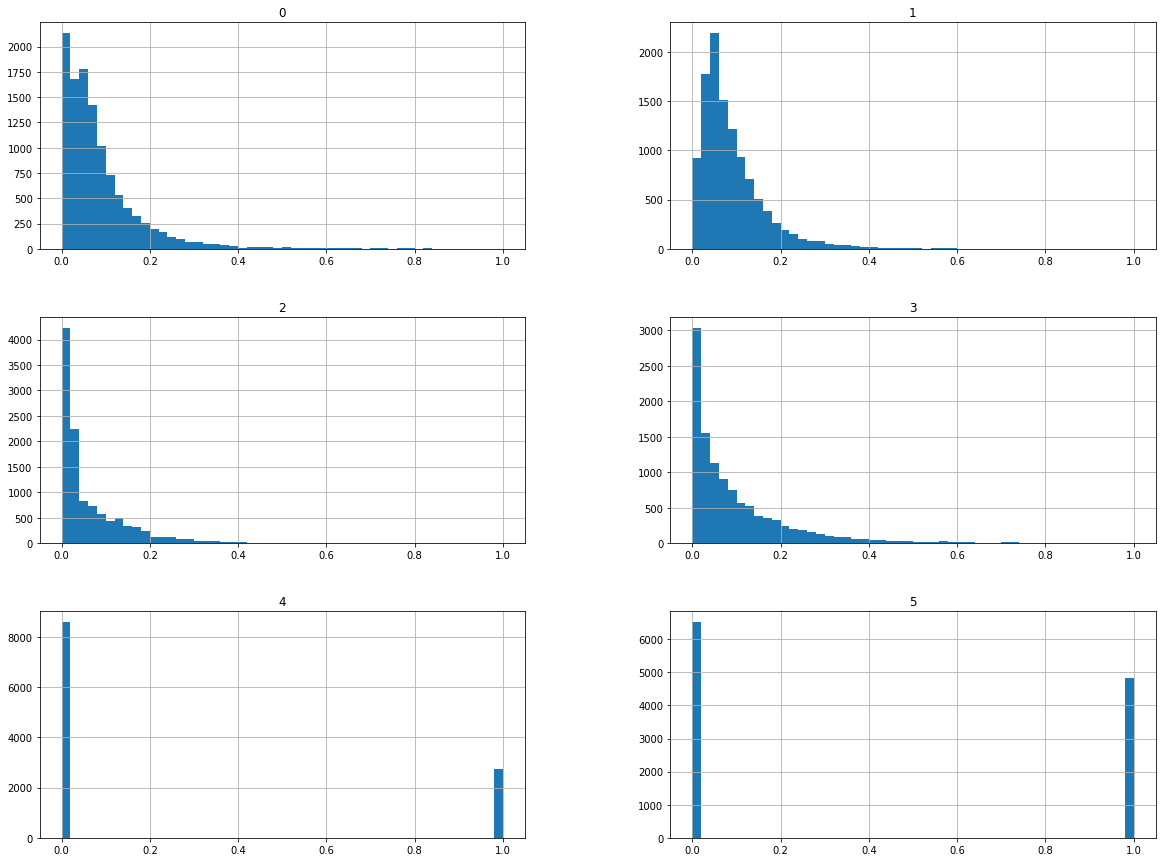

In [956]:
#Raw Data
df.hist(bins=50, figsize=(20,15))

#Scaled Data:
sdf1.hist(bins=50, figsize=(20,15))


## Pearson coefficient

### Using a loop to accumulate the r's for the features in X

In [957]:
pearson_rs = []
for col, item in sdf1.iteritems():
    pearson_rs.append(sp.stats.pearsonr(item, trainY['rating']))

### The highest r is fat at 0.125, then calories at 0.112, then protein at .116, peanut free at 0.081, sodium at 0.079, and bake at 0.074.

In [958]:
for each in pearson_rs:
    print(each[0])

0.12510094438317437
0.11238710088024306
0.11637318169164582
0.07923854231827958
0.07417411236055874
0.0805646984374423


## Apply PCA

### Apply with fit_transform and specify 95% variance.  

In [959]:
pca = PCA()
x_pca= pca.fit_transform(sdf1)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

### See that the resulting dataseet has the same shape.

In [960]:
print ('Scaled data shape: ', sdf1.shape)
print ('Transformed data shape: ', x_pca.shape)
print ('Explained variance: ', pca.explained_variance_ratio_)

Scaled data shape:  (11333, 6)
Transformed data shape:  (11333, 6)
Explained variance:  [0.53905226 0.37005504 0.06130983 0.02094432 0.00702862 0.00160992]


### The first PC accounts for 53% of the variance, the 2nd 37%, the 3rd 6%, and the rest 2% and less than 0.00%.

# Elbow Plot

### Shows that we reach 95% varriance with 2 components.
### When I used StandardScaler instead of MaxAbsScaler, 4 components were required.

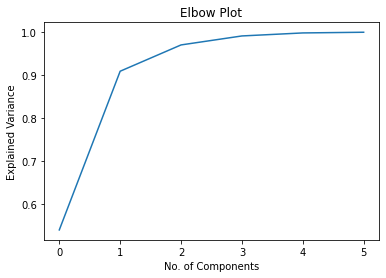

In [961]:
# The elbow plot of the explained variance

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('No. of Components')
plt.ylabel('Explained Variance')
plt.title('Elbow Plot')
plt.show()

# Logistic Regression

### Here I've settled on predicting 'winter' using calories.  Strangely, I got slightly better classification by training on 'calories' and predicting using 'bake', but that seems like nonsense so I left it alone.

In [962]:
x_col = sdf1[1].values.reshape(-1,1)
X = x_col
Y = trainY['winter']

# Perform logistic regression for the binary output
classifier = LogisticRegression()
classifier.fit(X, Y)

LogisticRegression()

# Confusion matrix

In [963]:
Y_pred = classifier.predict(sdf2[1].values.reshape(-1,1)) 
labels = [0, 1]
cm = confusion_matrix(testY['winter'], Y_pred, labels=labels)

print ('#Total cases', df.shape)
print ('#Training and testing cases', sdf1.shape, sdf2.shape)
print ('\nConfusion matrix:')
pd.DataFrame(cm, index=labels, columns=labels)

#Total cases (14167, 13)
#Training and testing cases (11333, 6) (2834, 6)

Confusion matrix:


,0,1
0,2378,3
1,452,1


In [964]:
print('Precision:',precision_score(testY['winter'],Y_pred,pos_label=1))
print('Recall:',recall_score(testY['winter'],Y_pred,pos_label=1))

Precision: 0.25
Recall: 0.002207505518763797


### That's not very good, but it's better than I was able to get using StandardScaler, which didn't predict any classes at all. Still, the coin-flip predictor is better than this, assuming a fair coin.

# Feature engineering 'healthy'

## Create new feature healthy: protein + calories / fat + sodium.  My original formula had protein in the numerator and the other nutrition features in the denominator. To try and get better results I changed it to this which turns out to be no better, but the thought was that healthy foods can contain healthy fats, so just dividing out fat content wouldn't necessarily correspond to healthy foods.

In [965]:
healthy = pd.Series(df.loc[:,'protein'] + df.loc[:,'fat'] / (df.loc[:,'calories'] + df.loc[:,'sodium']))

### The code below generates a warning but seemingly should not.  I just run it again to get rid of the warning.
### The error says: 'Try using .loc[row_indexer,col_indexer] = value instead', which I do, unless I'm just blind to a mistake.

In [968]:
df.loc[:,'healthy'] = healthy # Shouldn't be getting this warning.  

In [969]:
healthy

0        30.007107
1        18.012486
2         6.021212
4        20.032032
5        19.039698
           ...    
20047     2.021739
20048    22.022329
20049    31.031276
20050    45.020906
20051    73.002349
Length: 14167, dtype: float64

## We need to do a little bit of processing on the data set because of the new feature

In [970]:
df[df['healthy'].isnull()]

,calories,fat,sodium,protein,winter,spring,summer,fall,peanut free,bake,#cakeweek,22-minute meals,rating,healthy
4848,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,NaN
6669,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


#### Need to get rid of any 'healthy' NaNs.  After running this rerunning the last cell confirms the drop.

In [971]:
df = df.dropna()

### There are 20 instances with value inf for healthy, which need to be dropped.

In [972]:
infinite_health = df.iloc[df.values==np.inf]

In [973]:
df = df.drop(infinite_health.index)

## The histogram for healthy.

<AxesSubplot:>

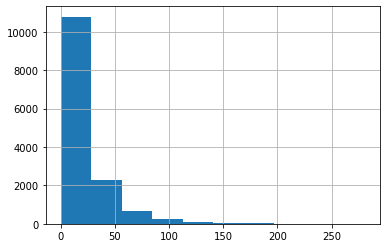

In [974]:
df['healthy'].hist()

## Creating new splits from the processed data in df and training with the new feature.

In [975]:
xList_h = ['fat','calories','protein','sodium','bake','peanut free', 'healthy'] 
yList_h = ['rating','#cakeweek','22-minute meals', 'winter','spring','summer','fall']

In [976]:
trainX_h, testX_h, trainY_h, testY_h = train_test_split(df[xList_h], df[yList_h], train_size = 0.8, 
                                                          test_size = 0.2, 
                                                          random_state = 100)

# Scale

#### Scale training X

In [977]:
scaler = MaxAbsScaler().fit(trainX_h)
scaled_data = scaler.transform(trainX_h)
sdf1_h = pd.DataFrame(scaled_data)
sdf1_h

,0,1,2,3,4,5,6
0,0.057432,0.056002,0.039146,0.042242,0.0,1.0,0.039266
1,0.131757,0.089723,0.067616,0.203203,1.0,1.0,0.067706
2,0.027027,0.023685,0.035587,0.088889,0.0,1.0,0.035635
3,0.003378,0.039141,0.007117,0.000400,0.0,1.0,0.007135
4,0.010135,0.035929,0.017794,0.013013,1.0,0.0,0.017836
...,...,...,...,...,...,...,...
11327,0.121622,0.074669,0.039146,0.007407,0.0,0.0,0.039456
11328,0.037162,0.081092,0.174377,0.035035,0.0,0.0,0.174432
11329,0.050676,0.060819,0.035587,0.027828,0.0,1.0,0.035705
11330,0.010135,0.013047,0.007117,0.004004,0.0,0.0,0.007243


#### Scale test X

In [978]:
scaler_test = MaxAbsScaler().fit(testX_h)
scaled_data_test = scaler_test.transform(testX_h)
sdf2_h = pd.DataFrame(scaled_data_test)

## Pearson coefficient for 'healthy', 'rating'

In [979]:
healthy_r = sp.stats.pearsonr(trainX_h['healthy'], trainY_h['rating'])

In [980]:
healthy_r[0]

0.11175401456317735

### Not highly correlated, but not surprising, becuase the goal was to create a feature 'healthy' and then see how correlated it was, rather than trying to create any   feature that might be more correlated with rating. I wonder if a feature called 'unhealthy' might have been more likely to lead to a high rating?  

# Prediction with healthy

In [981]:
pnf_h = sdf1_h[6].values.reshape(-1,1)
X_h = pnf_h
Y_h = trainY_h['winter']

# Split the dataset (569 instances) into the training set (70%) and testing (30%)
# random_state Controls the shuffling applied to the data before applying the split. 
# Pass an int for reproducible output across multiple function calls.
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 0)

# Perform logistic regression for the binary output
healthy_classifier = LogisticRegression()
healthy_classifier.fit(X_h, Y_h)

LogisticRegression()

# Confusion matrix

In [982]:
Y_pred_h = healthy_classifier.predict(sdf2_h[6].values.reshape(-1,1)) 
labels = [0, 1]
cm_h = confusion_matrix(testY_h['winter'], Y_pred_h, labels=labels)

print ('#Total cases', df.shape)
print ('#Training and testing cases', sdf1_h.shape, sdf2_h.shape)
print ('Confusion matrix:')
pd.DataFrame(cm_h, index=labels, columns=labels)

#Total cases (14165, 14)
#Training and testing cases (11332, 7) (2833, 7)
Confusion matrix:


,0,1
0,2397,4
1,432,0


In [983]:
print('Precision:',precision_score(testY_h['winter'],Y_pred_h, pos_label=1))
print('Recall:',recall_score(testY_h['winter'],Y_pred_h, pos_label=1))

Precision: 0.0
Recall: 0.0


### Not a very good classifier.

# Analysis/Reflections 

### I was not able to create an LR model that was a good predictor on this data. The sparseness of the data proved to be a real problem.  For instance, when I was attempting to predict '#cakeweek' and '22-minute meals' there were few to no instances in the test and training data that had a value of 1, so the model underfit.

### One very interesting part of the lab was discovering the difference that the MaxAbsScaler, which uses the largest absolute value of a feature's values to scale that feature.  Doing so caused a non-classifying model to classify a little, but also led to greater dimensionality reduction.   
 
### I wondered if the problem with 'healthy' was that it was created from all four of the nutrition features, even though not all of them are highly correlated with 'rating', but as in the California Hoousing Data example, it seems like it is generally a possiblilty to create a more highly correlated feature from multiple features that are not highly correlated with the target.

### One thing I decided notto include that I mentioned earlier was that I got not good but better classification results when I fit the LR model to the feature 'calories', predicting 'winter', and then predicted on the test set's 'bake' feature.  I imagine that the seemingly-improved performance was just a ghost becuase I would imagine that predicting on a different feature than you trained a regressor on would be meaningless with unpredictable results.  